<a href="https://colab.research.google.com/github/YarenFenci/-odev1/blob/main/YarenFenci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [4]:
df_confirmed = pd.read_csv("/content/drive/MyDrive/data/time_series_covid19_confirmed_global.csv")
df_deaths = pd.read_csv("/content/drive/MyDrive/data/time_series_covid19_deaths_global.csv")
df_recovered = pd.read_csv("/content/drive/MyDrive/data/time_series_covid19_recovered_global.csv")


In [5]:
def preprocess(df):
    df = df.drop(columns=["Province/State", "Lat", "Long"], errors='ignore')
    df = df.groupby("Country/Region").sum()
    # Sadece tarih sütunlarını alalım
    date_columns = df.columns
    df = df[date_columns]
    df = df.T
    df.index = pd.to_datetime(df.index, format="%m/%d/%y")  # Belirli formatla dönüştür
    return df

In [6]:
confirmed = preprocess(df_confirmed)
recovered = preprocess(df_recovered)
deaths = preprocess(df_deaths)

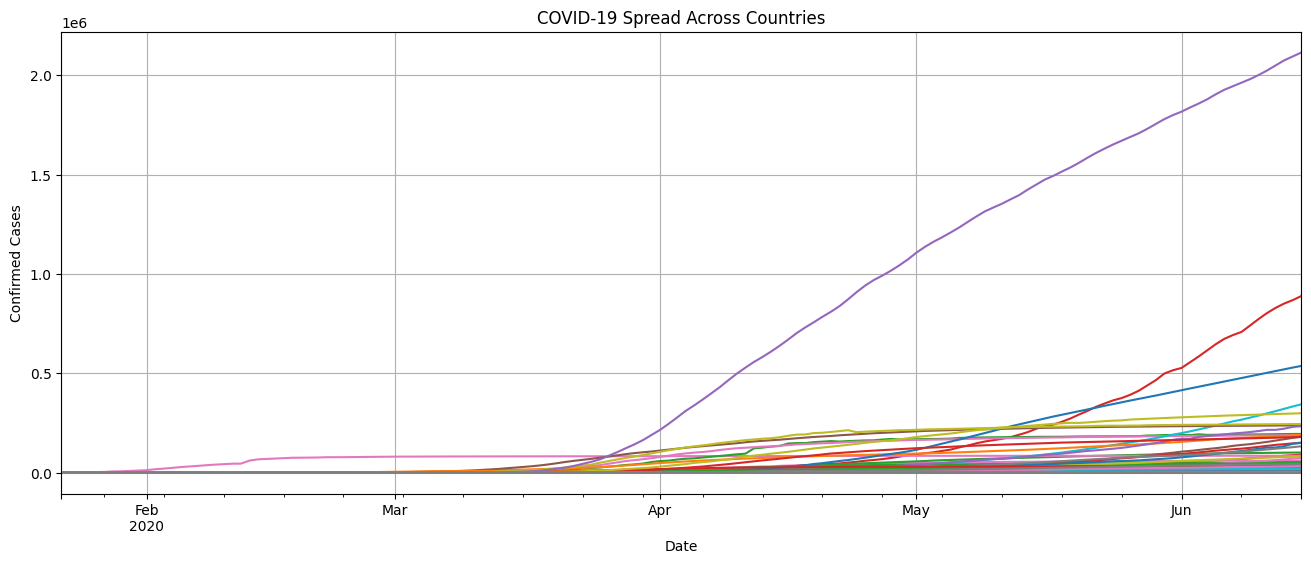

In [7]:
confirmed.plot(figsize=(16,6), legend=False)
plt.title("COVID-19 Spread Across Countries")
plt.ylabel("Confirmed Cases")
plt.xlabel("Date")
plt.grid(True)
plt.show()

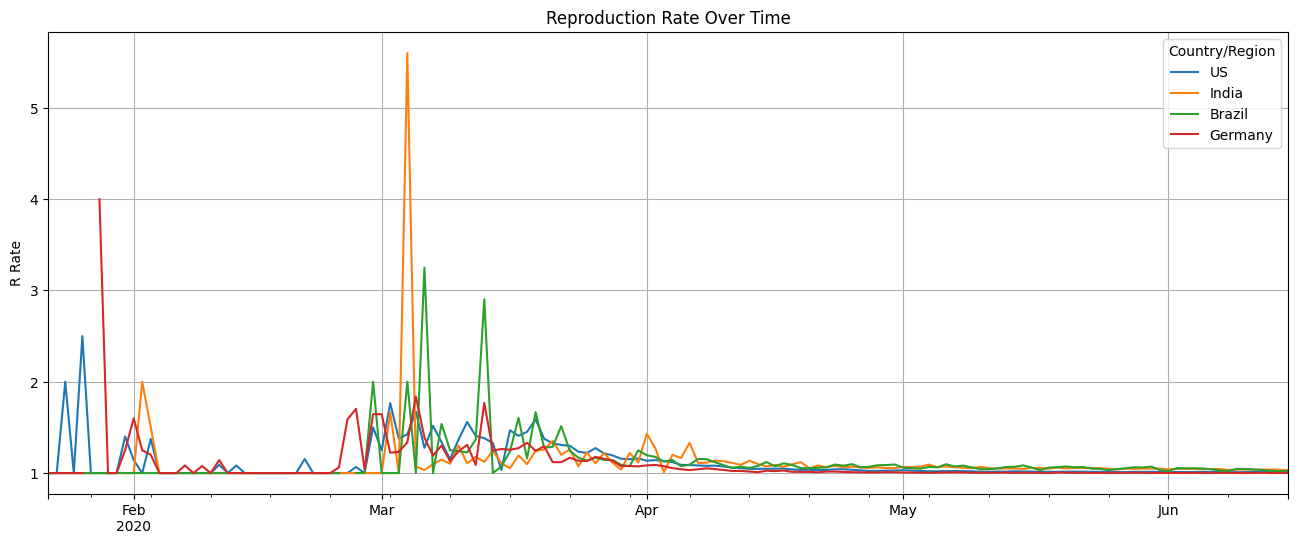

In [8]:
def calculate_r_rate(df):
    return df.pct_change().fillna(0) + 1

r_rate = calculate_r_rate(confirmed)

# Sadece bazı ülkeleri göster
selected = ['US', 'India', 'Brazil', 'Germany']
r_rate[selected].plot(figsize=(16,6))
plt.title("Reproduction Rate Over Time")
plt.ylabel("R Rate")
plt.grid(True)
plt.show()

Correlation between deaths and recoveries: 0.8028753051430435


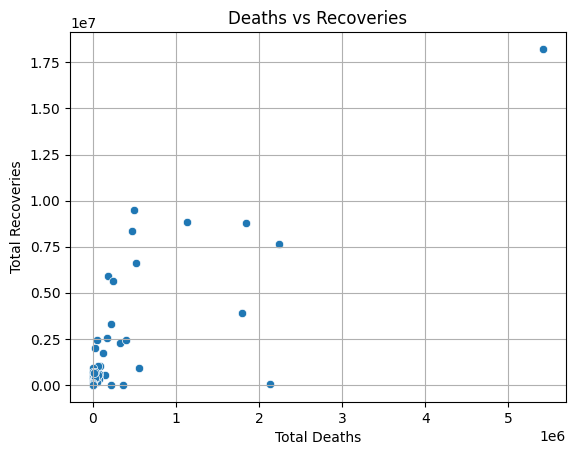

In [9]:
total_deaths = deaths.sum()
total_recovered = recovered.sum()

correlation = total_deaths.corr(total_recovered)
print("Correlation between deaths and recoveries:", correlation)

sns.scatterplot(x=total_deaths, y=total_recovered)
plt.title("Deaths vs Recoveries")
plt.xlabel("Total Deaths")
plt.ylabel("Total Recoveries")
plt.grid(True)
plt.show()

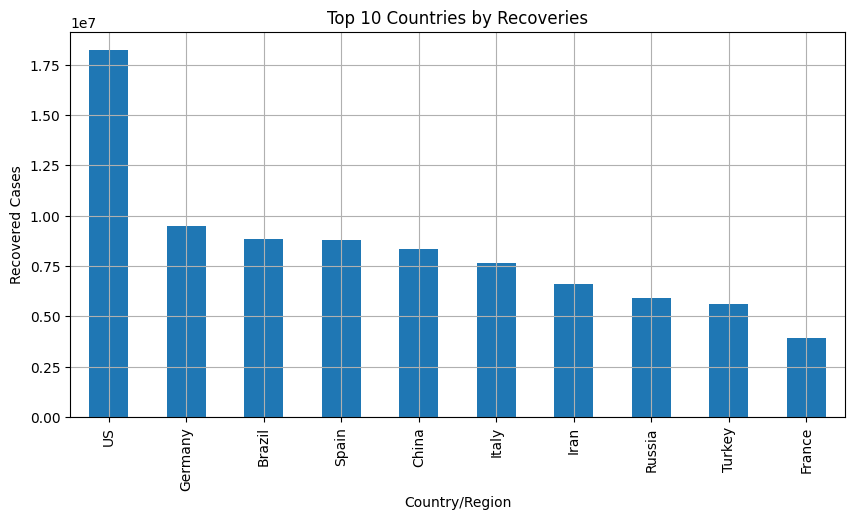

In [10]:
top_recovered = total_recovered.sort_values(ascending=False).head(10)
top_recovered.plot(kind="bar", title="Top 10 Countries by Recoveries", figsize=(10,5))
plt.ylabel("Recovered Cases")
plt.grid(True)
plt.show()